In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.2
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_30_51_300_0.2_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_30_51_300_0.2_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	253373411.4728

Best Fitness:	105592127.9009
Solution:	100.0000
Diff:		105592027.9009

[0:08:02][----------] 1.96% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	219057903.6438

Best Fitness:	52995021.6389
Solution:	100.0000
Diff:		52994921.6389

[0:15:32][----------] 3.92% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	297866645.9559

Best Fitness:	114380801.5250
Solution:	100.0000
Diff:		114380701.5250

[0:22:24][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	326223984.3441

Best Fitness:	123201660.3767
Solution:	100.0000
Diff:		123201560.3767

[0:29:23][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	236363095.8443

Best Fitness:	57396397.3336
Solution:	100.0000
Diff:		57396297.3336

[0:36:48][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	178499709.2348

Best Fitness:	57334206.3310
Solution:	100.0000
Diff:		57334106.3310

[0:43:19][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	248919230.3592

Best Fitness:	92845300.2874
Solution:	100.0000
Diff:		92845200.2874

[0:49:59][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	128738290.8338

Best Fitness:	38257440.2478
Solution:	100.0000
Diff:		38257340.2478

[0:56:42][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	241639071.6637

Best Fitness:	107531359.0815
Solution:	100.0000
Diff:		107531259.0815

[1:03:04][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	213826219.2837

Best Fitness:	80353772.0003
Solution:	100.0000
Diff:		80353672.0003

[1:09:41][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	232929271.8024

Best Fitness:	85157587.2713
Solution:	100.0000
Diff:		85157487.2713

[1:16:08][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	275927149.6818

Best Fitness:	101105857.6722
Solution:	100.0000
Diff:		101105757.6722

[1:22:24][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	204761917.5319

Best Fitness:	48311887.9210
Solution:	100.0000
Diff:		48311787.9210

[1:28:57][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	337540704.5737

Best Fitness:	130033318.0218
Solution:	100.0000
Diff:		130033218.0218

[1:35:27][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	220265933.5230

Best Fitness:	66988359.7719
Solution:	100.0000
Diff:		66988259.7719

[1:41:41][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	313567610.7107

Best Fitness:	91840367.2383
Solution:	100.0000
Diff:		91840267.2383

[1:47:48][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	267583132.9149

Best Fitness:	106497747.1986
Solution:	100.0000
Diff:		106497647.1986

[1:53:50][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	234075636.9752

Best Fitness:	107678845.2586
Solution:	100.0000
Diff:		107678745.2586

[2:00:00][####------] 35.29% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	223298801.9218

Best Fitness:	89800115.3628
Solution:	100.0000
Diff:		89800015.3628

[2:06:10][####------] 37.25% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	248415373.1346

Best Fitness:	94206826.0582
Solution:	100.0000
Diff:		94206726.0582

[2:12:25][####------] 39.22% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	236778299.8801

Best Fitness:	47505323.0856
Solution:	100.0000
Diff:		47505223.0856

[2:18:49][####------] 41.18% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	258954871.1184

Best Fitness:	91654302.3446
Solution:	100.0000
Diff:		91654202.3446

[2:24:54][####------] 43.14% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	269172243.1000

Best Fitness:	115614916.9736
Solution:	100.0000
Diff:		115614816.9736

[2:30:49][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	248971217.2938

Best Fitness:	109717855.3350
Solution:	100.0000
Diff:		109717755.3350

[2:36:13][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	282985374.9639

Best Fitness:	120997405.0135
Solution:	100.0000
Diff:		120997305.0135

[2:41:35][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	227441127.4117

Best Fitness:	77631008.6646
Solution:	100.0000
Diff:		77630908.6646

[2:47:05][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	272554422.6810

Best Fitness:	109332242.2861
Solution:	100.0000
Diff:		109332142.2861

[2:52:27][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	295616973.7628

Best Fitness:	82421954.6528
Solution:	100.0000
Diff:		82421854.6528

[2:57:37][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	171641286.9238

Best Fitness:	66277089.4944
Solution:	100.0000
Diff:		66276989.4944

[3:02:58][######----] 56.86% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	247769292.8226

Best Fitness:	89269539.1484
Solution:	100.0000
Diff:		89269439.1484

[3:08:38][######----] 58.82% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	274590517.2013

Best Fitness:	105764033.2132
Solution:	100.0000
Diff:		105763933.2132

[3:13:51][######----] 60.78% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	196795942.4670

Best Fitness:	56681860.3072
Solution:	100.0000
Diff:		56681760.3072

[3:18:58][######----] 62.75% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	267412862.5953

Best Fitness:	84526904.2813
Solution:	100.0000
Diff:		84526804.2813

[3:24:01][######----] 64.71% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	175638063.3662

Best Fitness:	52644319.7515
Solution:	100.0000
Diff:		52644219.7515

[3:29:03][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	239090463.6456

Best Fitness:	101636155.0236
Solution:	100.0000
Diff:		101636055.0236

[3:34:04][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	287145187.2882

Best Fitness:	67731619.7763
Solution:	100.0000
Diff:		67731519.7763

[3:39:13][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	269605798.7130

Best Fitness:	83631624.9095
Solution:	100.0000
Diff:		83631524.9095

[3:44:13][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	311621642.2355

Best Fitness:	113561323.3626
Solution:	100.0000
Diff:		113561223.3626

[3:49:14][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	229109705.3624

Best Fitness:	87742271.7390
Solution:	100.0000
Diff:		87742171.7390

[3:54:31][########--] 76.47% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	218886784.7017

Best Fitness:	82433275.8875
Solution:	100.0000
Diff:		82433175.8875

[3:59:35][########--] 78.43% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	249323540.3800

Best Fitness:	83046701.0085
Solution:	100.0000
Diff:		83046601.0085

[4:04:23][########--] 80.39% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	196138982.4021

Best Fitness:	38776475.0672
Solution:	100.0000
Diff:		38776375.0672

[4:09:23][########--] 82.35% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	207906104.6391

Best Fitness:	77045692.4912
Solution:	100.0000
Diff:		77045592.4912

[4:14:15][########--] 84.31% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	225253175.0522

Best Fitness:	78669961.2582
Solution:	100.0000
Diff:		78669861.2582

[4:19:19][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	314313220.4904

Best Fitness:	147715402.9555
Solution:	100.0000
Diff:		147715302.9555

[4:24:26][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	224450561.9411

Best Fitness:	70356896.4816
Solution:	100.0000
Diff:		70356796.4816

[4:29:33][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	167513539.6689

Best Fitness:	52733792.7902
Solution:	100.0000
Diff:		52733692.7902

[4:34:43][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	179855053.4437

Best Fitness:	23381017.8941
Solution:	100.0000
Diff:		23380917.8941

[4:39:38][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	210971334.9836

Best Fitness:	71563804.6205
Solution:	100.0000
Diff:		71563704.6205

[4:44:42][##########] 96.08% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	276882055.7967

Best Fitness:	122024762.8502
Solution:	100.0000
Diff:		122024662.8502

[4:49:30][##########] 98.04% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	212838141.9686

Best Fitness:	65890132.3543
Solution:	100.0000
Diff:		65890032.3543

[4:54:35][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:54:35

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
193,2.151459e+08,2.325433e+08,3.579461e+08,2.314426e+08,1.534313e+08,2.367893e+08,1.181918e+08,1.890121e+08,2.317925e+08,2.120400e+08,...,2.823081e+08,3.399939e+08,2.400096e+08,3.049495e+08,1.857849e+08,2.095387e+08,1.771834e+08,2.559402e+08,3.020132e+08,50
194,2.151459e+08,2.325433e+08,3.579461e+08,2.314426e+08,1.534313e+08,2.367893e+08,1.181918e+08,1.890121e+08,2.317925e+08,2.120400e+08,...,2.823081e+08,3.399939e+08,2.400096e+08,3.049495e+08,1.857849e+08,2.095387e+08,1.771834e+08,2.559402e+08,3.020132e+08,50
195,2.151459e+08,2.325433e+08,3.579461e+08,2.314426e+08,1.534313e+08,2.367893e+08,1.181918e+08,1.890121e+08,2.317925e+08,2.120400e+08,...,2.823081e+08,3.399939e+08,2.400096e+08,3.049495e+08,1.857849e+08,2.095387e+08,1.771834e+08,2.559402e+08,3.020132e+08,50
196,2.151459e+08,2.325433e+08,3.579461e+08,2.314426e+08,1.534313e+08,2.367893e+08,1.181918e+08,1.890121e+08,2.317925e+08,2.120400e+08,...,2.823081e+08,3.399939e+08,2.400096e+08,3.049495e+08,1.857849e+08,2.095387e+08,1.771834e+08,2.559402e+08,3.020132e+08,50
197,2.151459e+08,2.325433e+08,3.579461e+08,2.314426e+08,1.534313e+08,2.367893e+08,1.181918e+08,1.890121e+08,2.317925e+08,2.120400e+08,...,2.823081e+08,3.399939e+08,2.400096e+08,3.049495e+08,1.857849e+08,2.095387e+08,1.771834e+08,2.559402e+08,3.020132e+08,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 105592027.90089403

Best error for run 1: 52994921.63890614

Best error for run 2: 114380701.52497314

Best error for run 3: 123201560.37672414

Best error for run 4: 57396297.333603755

Best error for run 5: 57334106.33102078

Best error for run 6: 92845200.28738263

Best error for run 7: 38257340.24779766

Best error for run 8: 107531259.081528

Best error for run 9: 80353672.0002638

Best error for run 10: 85157487.27133113

Best error for run 11: 101105757.6721585

Best error for run 12: 48311787.92098708

Best error for run 13: 130033218.02182715

Best error for run 14: 66988259.77188799

Best error for run 15: 91840267.2383158

Best error for run 16: 106497647.19864221

Best error for run 17: 107678745.25862175

Best error for run 18: 89800015.36281727

Best error for run 19: 94206726.05816093

Best error for run 20: 47505223.08564346

Best error for run 21: 91654202.34457816

Best error for run 22: 115614816.97358295

Best error for run 23: 109717755.33495337

Best error for run 24: 120997305.01349877

Best error for run 25: 77630908.66456181

Best error for run 26: 109332142.28614166

Best error for run 27: 82421854.65282716

Best error for run 28: 66276989.49438789

Best error for run 29: 89269439.14844869

Best error for run 30: 105763933.21316262

Best error for run 31: 56681760.30718854

Best error for run 32: 84526804.28125796

Best error for run 33: 52644219.75149996

Best error for run 34: 101636055.02363075

Best error for run 35: 67731519.77632573

Best error for run 36: 83631524.90950441

Best error for run 37: 113561223.3626169

Best error for run 38: 87742171.73901965

Best error for run 39: 82433175.88748784

Best error for run 40: 83046601.00846788

Best error for run 41: 38776375.06716766

Best error for run 42: 77045592.49122435

Best error for run 43: 78669861.25821051

Best error for run 44: 147715302.9554871

Best error for run 45: 70356796.48157123

Best error for run 46: 52733692.790168464

Best error for run 47: 23380917.894122507

Best error for run 48: 71563704.62051736

Best error for run 49: 122024662.85017437

Best error for run 50: 65890032.35432728

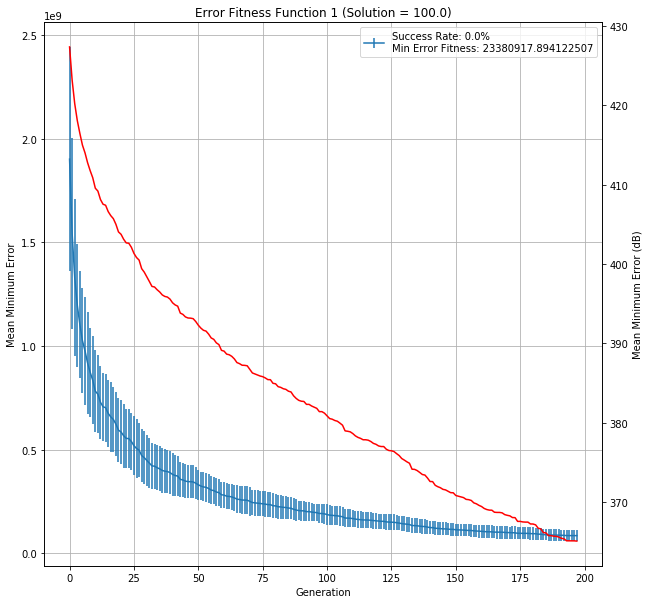

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_30_51_300_0.2_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,30,0.2,1.055920e+08,5.299492e+07,1.143807e+08,1.232016e+08,5.739630e+07,5.733411e+07,...,1.477153e+08,7.035680e+07,5.273369e+07,2.338092e+07,7.156370e+07,1.220247e+08,6.589003e+07,8.489183e+07,4:54:35,60000
